In [13]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [14]:
from LoadMultiFiles import LoadOneFileUproot
dict_step = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/build/stepRecording_8ns.root",
                              name_branch="stepRecord", return_list=False)

# 8 ns Peak

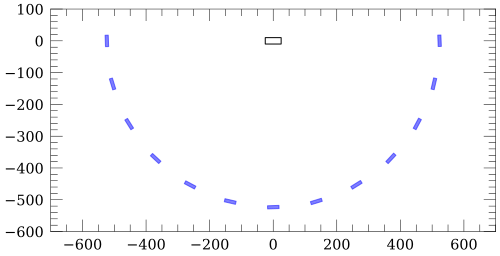

In [48]:
def PlotFarPMT(ax:plt.Axes=None):
    import matplotlib.patches as patches
    from matplotlib import transforms
    R = 500+25+3 # mm
    v_theta = np.concatenate((np.arange(0, 105, 15)+2, np.arange(270, 360, 15)+2))
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.add_patch(patches.Rectangle((-25, -10), 50, 20,
                    edgecolor='k',
                    facecolor='none',
                    lw=1) )
    for theta in v_theta:

        r1 = patches.Rectangle((R*np.sin(np.deg2rad(theta)),-R*np.cos(np.deg2rad(theta))),
                               10, 36, color="blue", alpha=0.50, angle=theta+90,)
        # t2 = transforms.Affine2D().rotate_deg(theta) + ax.transData
        # r1.set_transform(t2)
        ax.add_patch(r1)
    ax.set_xlim(-700, 700)
    ax.set_ylim(-600, 100)
    ax.set_aspect(1.0)
    if ax is None:
        return ax
PlotFarPMT()

[0.54529547 0.57922745 0.57922745 0.58436684 0.58436684 3.18608988
 3.18608988 3.18608988 3.18608988 8.51539337 8.51539337 8.51606244]


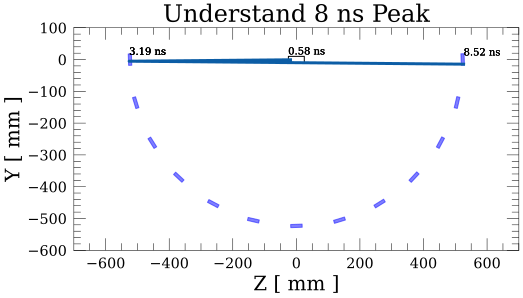

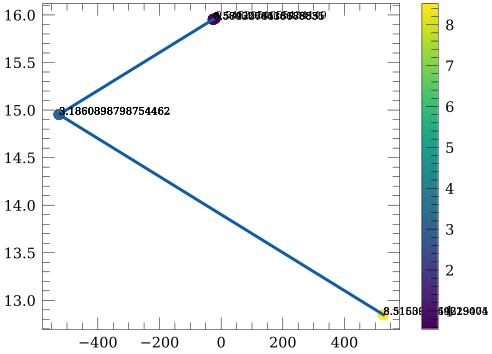

In [53]:



index_8ns_peak = (dict_step["evtID"]==135)& (dict_step["trackID"]==1879)
# index_8ns_peak = (dict_step["evtID"]==0)& (dict_step["trackID"]==2683)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot( dict_step["z"][index_8ns_peak], dict_step["y"][index_8ns_peak])
for i in range(2,len(dict_step["z"][index_8ns_peak])):
    ax.text( dict_step["z"][index_8ns_peak][i], dict_step["x"][index_8ns_peak][i], f"{dict_step['t'][index_8ns_peak][i]:.2f} ns")
PlotFarPMT(ax)
ax.set_xlabel("Z [ mm ]")
ax.set_ylabel("Y [ mm ]")
ax.set_title("Understand 8 ns Peak")

plt.figure()
plt.plot( dict_step["z"][index_8ns_peak], dict_step["x"][index_8ns_peak])
plt.scatter( dict_step["z"][index_8ns_peak], dict_step["x"][index_8ns_peak], c=dict_step["t"][index_8ns_peak])
for i in range(len(dict_step["z"][index_8ns_peak])):
    plt.text( dict_step["z"][index_8ns_peak][i], dict_step["x"][index_8ns_peak][i], dict_step["t"][index_8ns_peak][i])
plt.colorbar()

print(dict_step["t"][index_8ns_peak])



# for n in range(len(dict_step["z"][index_8ns_peak])-1):
#     print( dict_step["VolumeName"][index_8ns_peak][n], dict_step["t"][index_8ns_peak][n]-dict_step["t"][index_8ns_peak][n+1],( (dict_step["x"][index_8ns_peak][n]-dict_step["x"][index_8ns_peak][n+1])**2+(dict_step["y"][index_8ns_peak][n]-dict_step["y"][index_8ns_peak][n+1])**2+(dict_step["z"][index_8ns_peak][n]-dict_step["z"][index_8ns_peak][n+1])**2 )**0.5/(dict_step["t"][index_8ns_peak][n]-dict_step["t"][index_8ns_peak][n+1] ) )

In [ ]:
n_step_to_plot = 250
for trackID in list( set( dict_step["trackID"]) ):
    index_trackID = (dict_step["trackID"]==trackID)
    v_time = dict_step["t"][index_trackID]
    if max(v_time)-min(v_time) >20:
        print(trackID)
        plt.figure()
        plt.plot(  dict_step["z"][index_trackID][:n_step_to_plot], dict_step["x"][index_trackID][:n_step_to_plot], linewidth=0.5 )
        plt.figure()
        plt.plot(  dict_step["z"][index_trackID][:n_step_to_plot], dict_step["y"][index_trackID][:n_step_to_plot], linewidth=0.5 )
        plt.xlim(-25, 25)
        plt.ylim(-2, 2)

In [ ]:
def GetIndexOutLS(v_x, v_y, v_z, x_LS=30,y_LS=3, z_LS=30):
    print(np.where( np.abs(v_x)>x_LS) )
    print(np.where( np.abs(v_y)>y_LS) )
    print(np.where( np.abs(v_z)>z_LS) )
    print(v_z[np.abs(v_z)>z_LS])
    return (np.abs(v_x)>x_LS)|(np.abs(v_y)>y_LS)|(np.abs(v_z)>z_LS)
n_step_to_plot = None
for trackID in [833]:
    index_trackID = (dict_step["trackID"]==trackID)
    v_time = dict_step["t"][index_trackID]
    print(trackID)
    index_OutLS = GetIndexOutLS(dict_step["x"][index_trackID], dict_step["y"][index_trackID], dict_step["z"][index_trackID])
    num_OutLS = np.where(index_OutLS)[0][0]-50
    
    plt.plot(  dict_step["z"][index_trackID][num_OutLS:][:n_step_to_plot], dict_step["x"][index_trackID][num_OutLS:][:n_step_to_plot], linewidth=3 )
    plt.xlabel("Z [ mm ]")
    plt.ylabel("X [ mm ]")
    plt.figure()
    plt.plot(  dict_step["z"][index_trackID][num_OutLS:][:n_step_to_plot], dict_step["y"][index_trackID][num_OutLS:][:n_step_to_plot], linewidth=3 )
    plt.xlabel("Z [ mm ]")
    plt.ylabel("Y [ mm ]")
    print(dict_step["t"][index_trackID][num_OutLS:])

    plt.figure()
    plt.plot(  dict_step["z"][index_trackID], dict_step["x"][index_trackID], linewidth=1 )
    plt.xlabel("Z [ mm ]")
    plt.ylabel("X [ mm ]")
    plt.figure()
    plt.plot(  dict_step["z"][index_trackID], dict_step["y"][index_trackID], linewidth=1 )
    plt.xlabel("Z [ mm ]")
    plt.ylabel("Y [ mm ]")
    # plt.xlim(-25, 25)
    # plt.ylim(-10, 10)